**SA463A &#x25aa; Data Wrangling and Visualization &#x25aa; Fall 2021 &#x25aa; Uhan**

# Lesson 0. Course Overview

## In this lesson...

- What is data visualization?


- What is data wrangling?


- Goals for this course

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## What is data visualization?

- **Data visualization** is the graphical representation of information


- You've been exposed to a variety of different visualizations throughout your life: charts, graphs, maps, etc.


- Good data visualization is important: it can help us see trends and outliers and find insights in large datasets


- In SM286D, you've used [Matplotlib](https://matplotlib.org/) to create basic data visualizations


- In this course, we will use [**Altair**](https://altair-viz.github.io/), a modern Python visualization library, to create a wide variety of visualizations, including interactive ones


- For example, you will learn how to create a visualization like this:

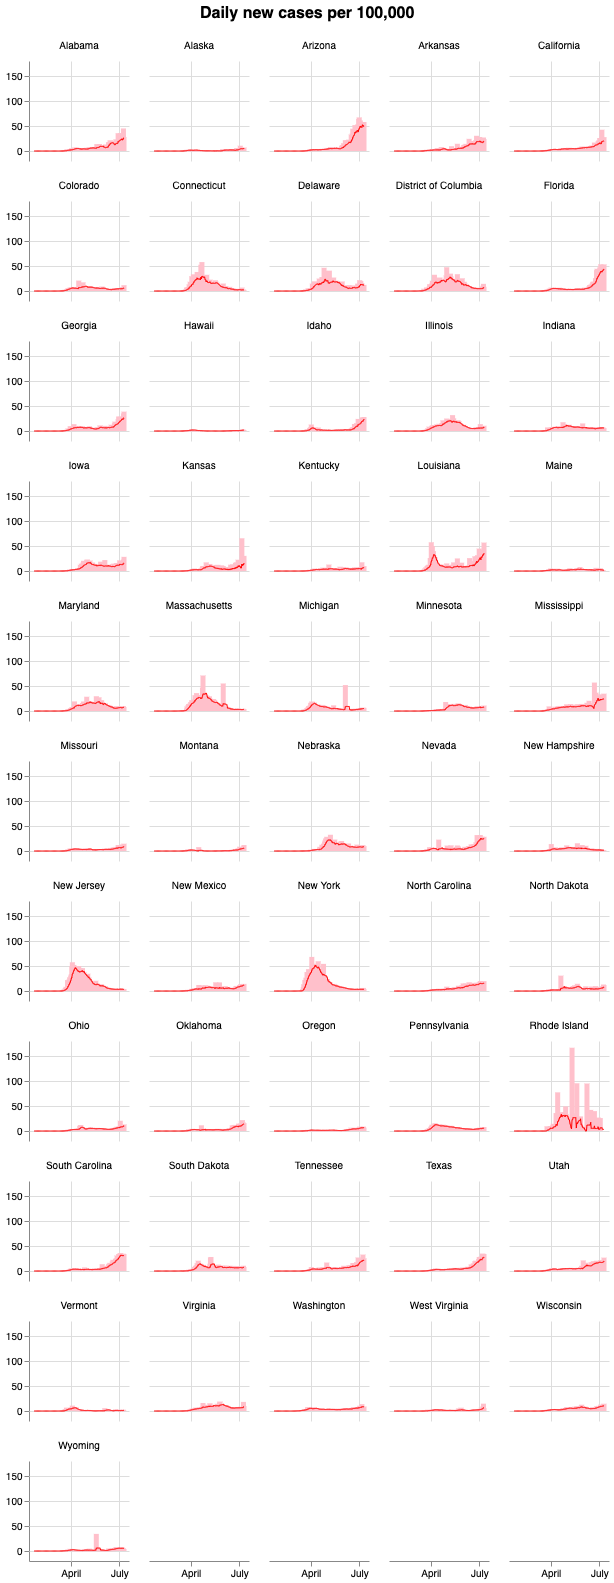

In [1]:
import altair as alt
alt.renderers.enable('jupyterlab')

data_url = 'data/covid_us_by_state.csv'

daily_per_capita = alt.Chart().mark_bar(
    color='pink'
).encode(
    alt.X('date:T'),
    alt.Y('daily_cases_per_capita:Q'),
    [alt.Tooltip('date:T', title='Date'),
     alt.Tooltip('daily_cases:Q', title='New cases'),
     alt.Tooltip('daily_cases_per_capita:Q', 
                 title='New cases per 100,000')]
).properties(
    width=100,
    height=100
)

trend_per_capita = alt.Chart().transform_window(
    groupby=['state'],
    frame=[-7, 0],
    rolling_avg='mean(daily_cases_per_capita)'
).mark_line(
    color='red',
    size=1
).encode(
    alt.X('date:T'),
    alt.Y('rolling_avg:Q')
)

(daily_per_capita + trend_per_capita).facet(
    data=data_url,
    facet=alt.Facet('state:N', header=alt.Header(title=None)),
    columns=5
).properties(
    title='Daily new cases per 100,000'
).configure_axis(
    title=None
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=16,
    anchor='middle',
    offset=20
)

- Here's another example of a data visualization you'll learn to create:

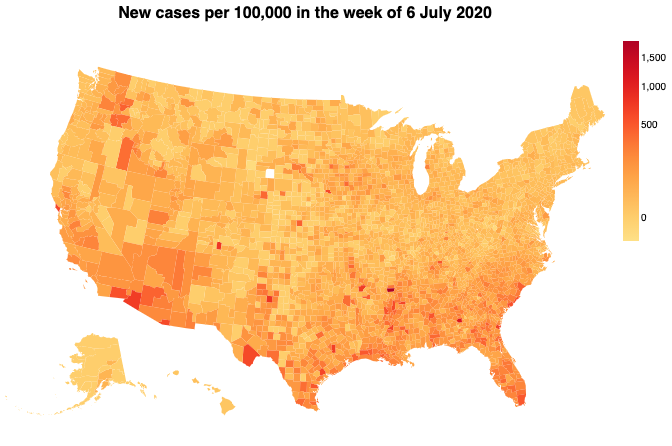

In [2]:
import altair as alt
import vega_datasets as vega
alt.renderers.enable('jupyterlab')

counties = alt.topo_feature(vega.data.us_10m.url, 'counties')
data_url = 'data/covid_us_06jul2020.csv'

alt.Chart(counties).transform_lookup(
    lookup='id',
    from_=alt.LookupData(
        data_url, 'county_fips', 
        ['state', 'county', 'weekly_cases_per_capita']
    )
).mark_geoshape().encode(
    alt.Color(
        'weekly_cases_per_capita:Q',
        title=None,
        scale=alt.Scale(scheme='yelloworangered', type='sqrt')
    ),
    tooltip=[
        alt.Tooltip('state:N', title='State'),
        alt.Tooltip('county:N', title='County'),
        alt.Tooltip('weekly_cases_per_capita:Q', 
                    title='New cases per 100,000 in the last week')
    ]
).project(
    type='albersUsa'
).properties(
    width=600,
    height=400,
    title='New cases per 100,000 in the week of 6 July 2020'
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=16,
    anchor='middle',
    offset=20
)

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## What is data wrangling?

- **Data wrangling** (sometimes called **data munging**) is the act of transforming or manipulating data into the right form you need for analysis


- This might involve filtering or rearranging data, creating new data based on the existing data, or merging different datasets together


- For example, the map chart above (known as a [**chloropleth map**](https://en.wikipedia.org/wiki/Choropleth_map)) is based on the following dataset:

In [3]:
import pandas as pd

df = pd.read_csv('data/covid_us_06jul2020.csv')
df.head()

,county_fips,date,total_cases,total_deaths,latitude,longitude,state,county,population,weekly_cases,weekly_cases_per_capita,total_cases_per_capita
0,1001,2020-07-06,618.0,13.0,32.53,-86.65,Alabama,Autauga County,55869.0,91.0,162.88,1106.16
1,1003,2020-07-06,911.0,10.0,30.66,-87.75,Alabama,Baldwin County,223234.0,268.0,120.05,408.09
2,1005,2020-07-06,356.0,2.0,31.87,-85.41,Alabama,Barbour County,24686.0,34.0,137.73,1442.11
3,1007,2020-07-06,197.0,1.0,33.02,-87.13,Alabama,Bibb County,22394.0,32.0,142.90,879.70
4,1009,2020-07-06,247.0,1.0,33.98,-86.57,Alabama,Blount County,57826.0,48.0,83.01,427.14


- Unfortunately, there is no ready-made dataset out there that looks like this one!


- The data for the above visualizations came from 4 different datasets, managed by different parties


- The data was merged and transformed into the particular form that Altair could use

- Data wrangling isn't glamorous, but it is very necessary!
    - Real datasets, unlike the datasets you often encounter in class, are messy
    - It's pretty common to spend more time on data wrangling than data analysis!


- We'll learn how to wrangle datasets with [**Pandas**](https://pandas.pydata.org/), a Python library for data manipulation and analysis

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Goals for this course

- Learn to create sophisticated visualizations of large datasets that provide useful insights for decision-making as well as further modeling and analysis


- Learn to wrangle large, messy datasets into forms suitable for modeling and analysis in operations research and statistics


- Work on projects involving real-world data sources


- Acquire skills that will help you work with real-world data sources for your capstone projects


- Improve your fluency with Python